In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [2]:
# read data file
cmp = pd.read_csv('Company_Data.csv')

In [3]:
cmp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
cmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
cmp.shape

(400, 11)

In [6]:
cmp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
##preprocessing of data

In [8]:
label_encoder = preprocessing.LabelEncoder()
cmp['ShelveLoc']= label_encoder.fit_transform(cmp['ShelveLoc']) 

In [9]:
label_encoder = preprocessing.LabelEncoder()
cmp['Urban']= label_encoder.fit_transform(cmp['Urban']) 

In [10]:
label_encoder = preprocessing.LabelEncoder()
cmp['US']= label_encoder.fit_transform(cmp['US']) 

In [11]:
cmp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
cmp['Sales'].max()

16.27

In [13]:
Sales_Rg=pd.cut(cmp.Sales,bins=[0,4,8,12,17],labels=['Low','Medium','High','Very High'])

In [14]:
cmp['Sales_Range']=Sales_Rg

In [15]:
cmp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Range
0,9.50,138,73,11,276,120,0,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,Very High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


In [16]:
cmp.Sales_Range.value_counts()

Medium       200
High         137
Low           35
Very High     27
Name: Sales_Range, dtype: int64

In [17]:
label_encoder = preprocessing.LabelEncoder()
cmp['Sales_Range']= label_encoder.fit_transform(cmp['Sales_Range']) 

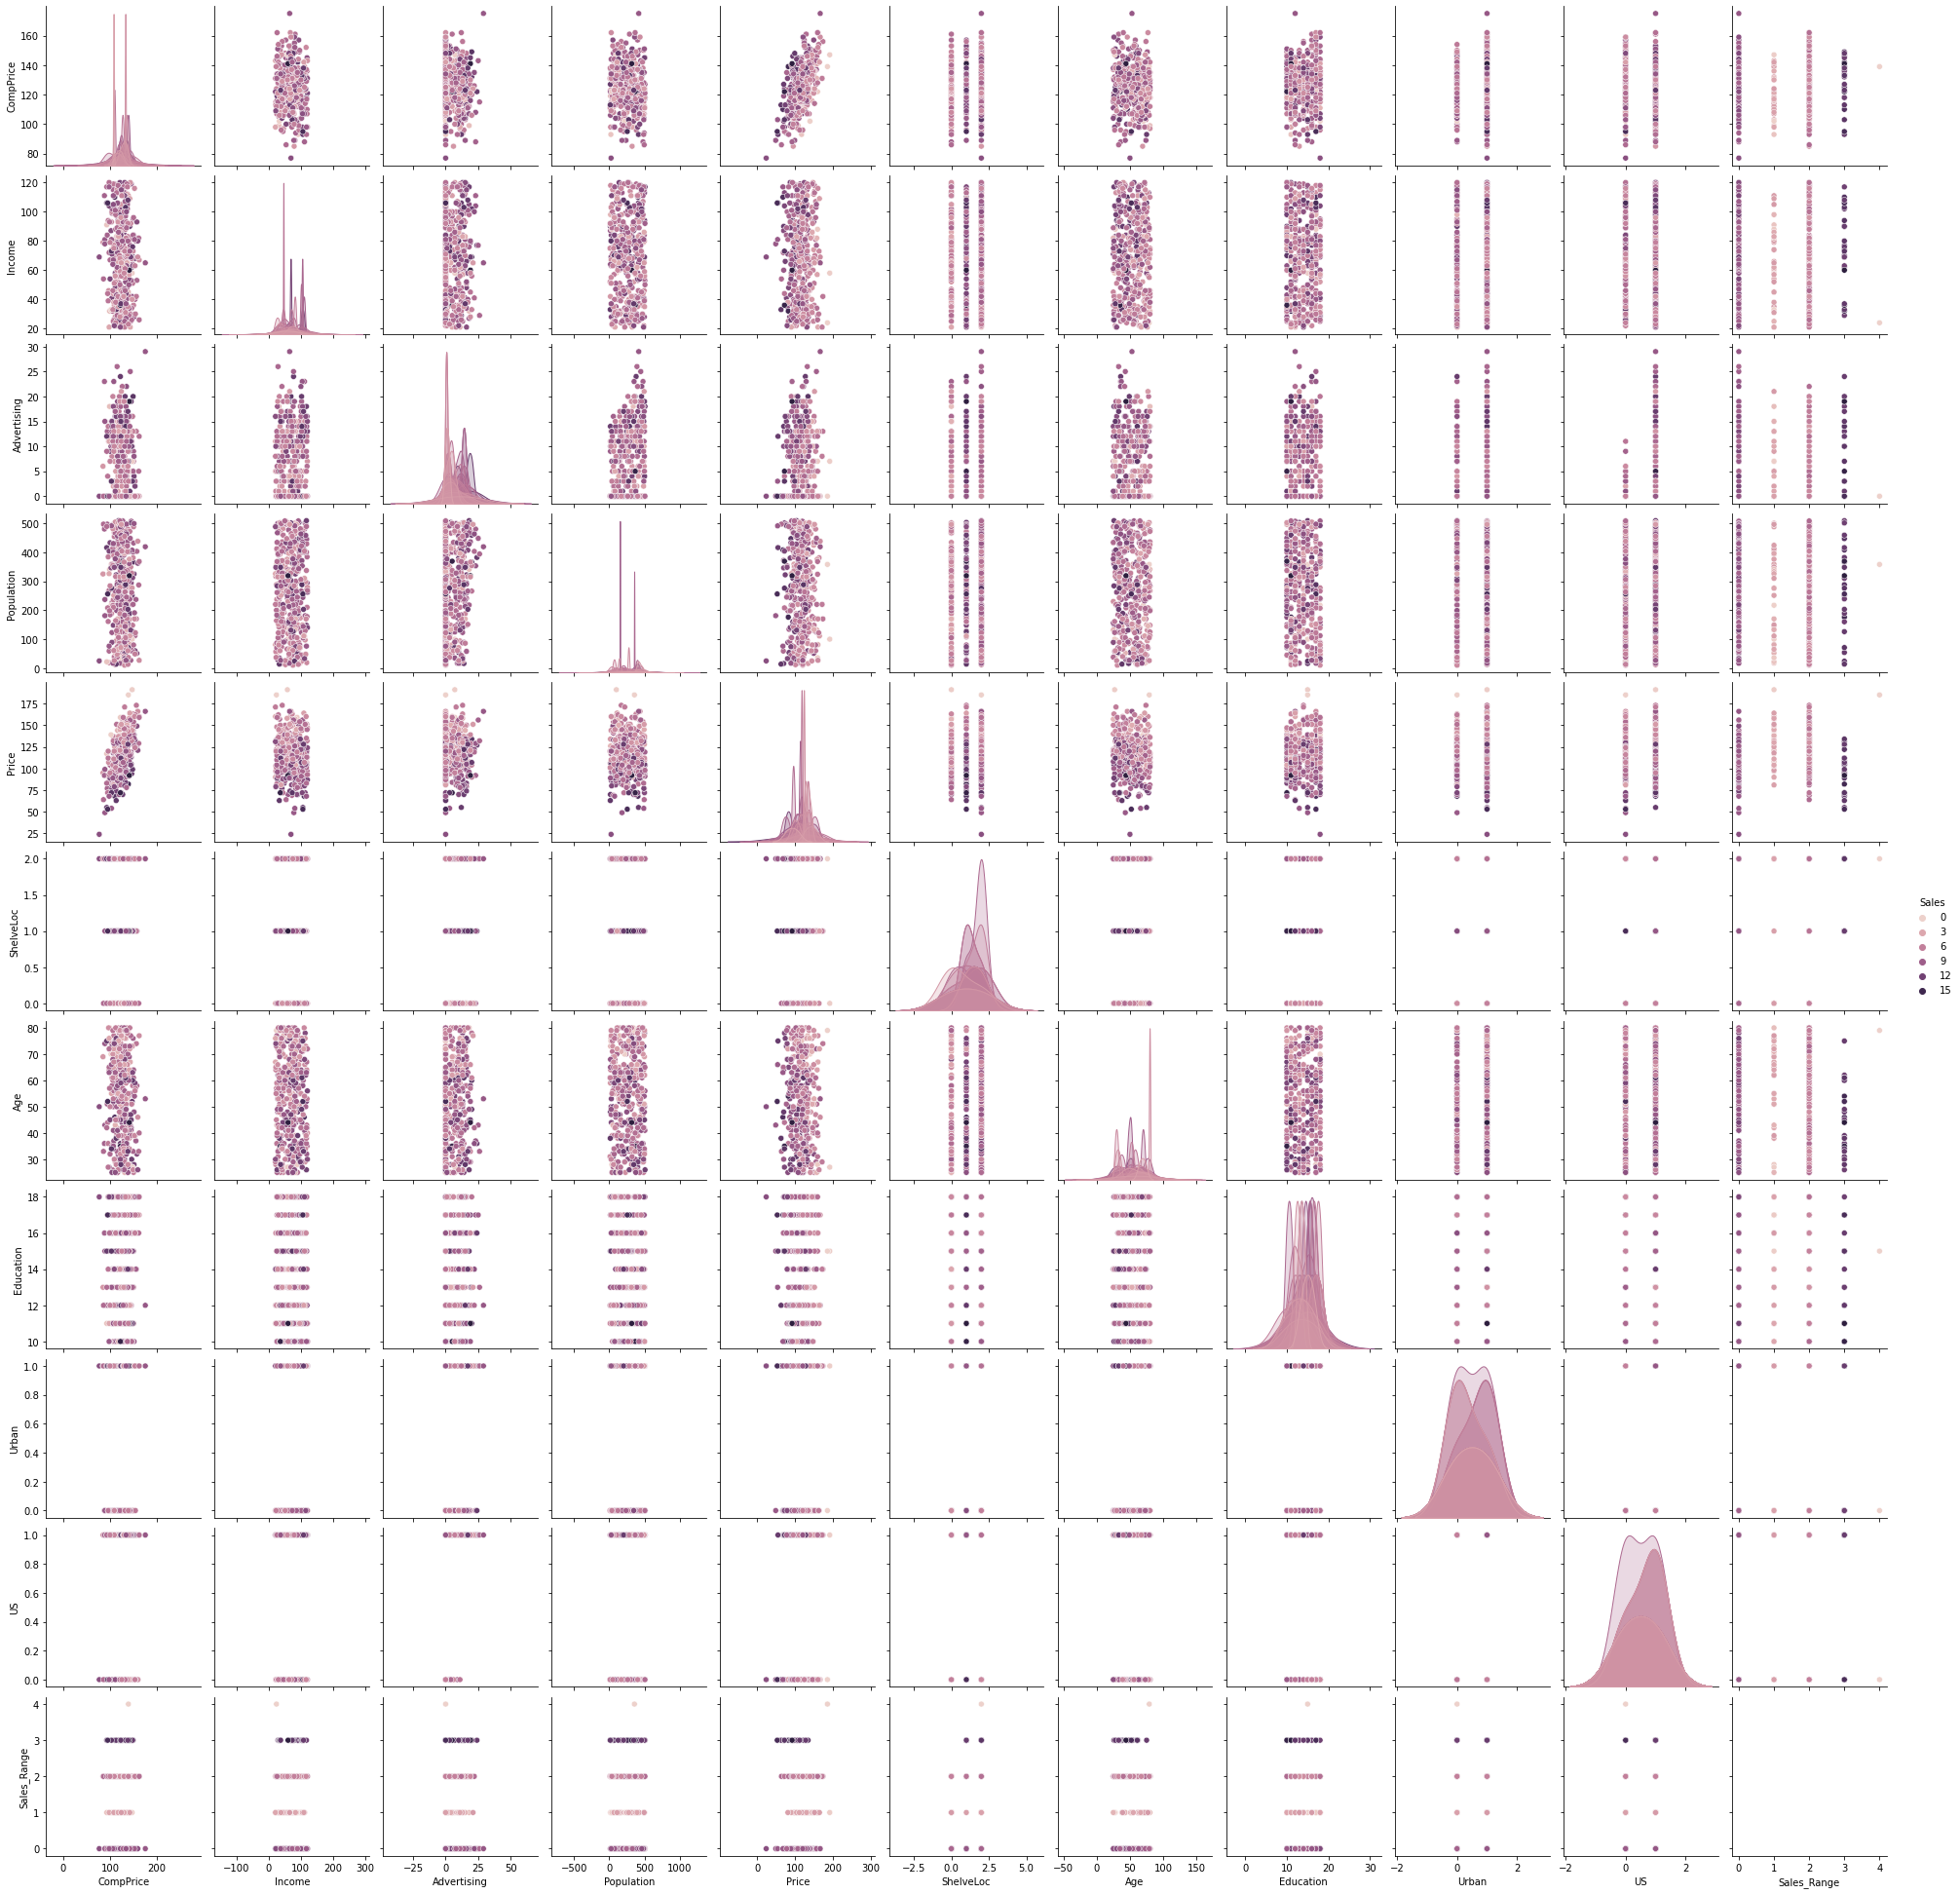

In [18]:
# let's pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=cmp, hue = 'Sales')

In [19]:
# Split features and target
x = cmp[["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"]]
y = cmp["Sales_Range"]

In [20]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [21]:
array=x.values

In [22]:
X=array

In [23]:
X

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [24]:
y

0      0
1      0
2      0
3      2
4      2
      ..
395    3
396    2
397    2
398    2
399    0
Name: Sales_Range, Length: 400, dtype: int32

In [25]:
array1=y.values

In [26]:
Y=array1
Y

array([0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 2, 3,
       2, 2, 0, 3, 0, 2, 1, 2, 3, 0, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 3, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 0, 3, 2, 0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 3, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 3, 0, 2, 4, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 3, 0, 2, 2, 3, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 3, 0, 2, 1, 2, 2, 0, 0,
       0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 0, 0, 2, 1, 0, 3,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 3, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 0, 1, 0, 0, 0,

# Bagged Decision Trees for Classification

In [27]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.63


# Random Forest Classification

In [28]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()) 

0.635
